# Catchment hydrological model with 1-parameter

Let's create a very simple hydrological model that estimates the daily outflow of from a catchment as a function of the daily rainfall falling on the catchment area. The catchment of study is covered by both urban and agricultural land and has a surface area A = 500 ha

![lumped model](util/Lumped_model.png).

The model consists of a single equation to estimate the daily outflow $Q$ (m3/day):

$Q = R * 0.001 * A * C$

where $R$ is the daily rainfall (mm/day), $A$ is the catchment area (m2) and $C$ is the unique model parameter and which is unitless (-)

Let's create the model using Python code and run it with some rainfall data to better understand how the model works.

The first thing, as always, is to import the Python libraries that we are going to need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact # to create interactive elements and figures

## Load data
We have observed daily rainfall (mm/day) and outflow (m3/day) data from 2010 to 2019 in a Excel file that we are going to load and save as a Pandas dataframe

In [2]:
obs_data = pd.read_excel('Datos/data example 2.xlsx', index_col = 'date')
obs_data

,rain,etp,outflow
date,,,
2010-01-01,1.270,1.168133,6531.84
2010-01-02,2.032,0.262242,6531.84
2010-01-03,25.654,0.991814,74995.20
2010-01-04,13.462,0.808446,33868.80
2010-01-05,24.638,0.849716,101606.40
...,...,...,...
2019-12-28,0.000,0.200841,9918.72
2019-12-29,0.000,0.738878,8951.04
2019-12-30,0.000,0.848909,8467.20


Let's have a look at one specific year

In [3]:
year_of_study = 2018
obs_data_year = obs_data[obs_data.index.year == year_of_study]
obs_data_year

,rain,etp,outflow
date,,,
2018-01-01,0.000,0.433923,6048.00
2018-01-02,0.000,0.622425,5564.16
2018-01-03,0.000,0.960588,5564.16
2018-01-04,0.000,0.449020,5322.24
2018-01-05,0.000,1.137825,5322.24
...,...,...,...
2018-12-27,0.000,1.175998,5564.16
2018-12-28,0.000,0.238610,5322.24
2018-12-29,0.254,0.788683,5080.32


Let's plot the rainfall data of the year of study

Text(0, 0.5, 'rain [mm/day]')

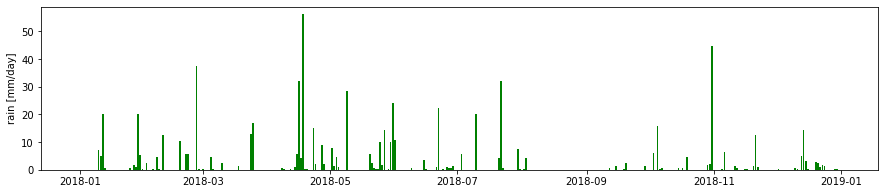

In [4]:
plt.figure(figsize = (15,3))
plt.bar(obs_data_year.index, obs_data_year['rain'], color = 'green')
plt.ylabel('rain [mm/day]')

And the outflow data

Text(0, 0.5, 'outflow [m3/day]')

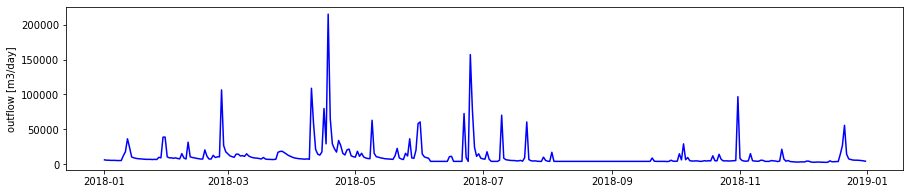

In [5]:
plt.figure(figsize = (15,3))
plt.plot(obs_data_year.index, obs_data_year['outflow'], color = 'blue')
plt.ylabel('outflow [m3/day]')

Now, let's create our model. For this purpose we define a function called *hydro_model*

In [6]:
def hydro_model(R,A,C): # model inputs are always between ()
    
    Q = R *0.001 * A * C # equation to estimate the catchment outflow Q. Note: 0.001 is to transform the rainfall (mm) into m    
    
    return Q

We run the model we have just created by calling the function and defining the inputs

In [7]:
# Inputs
A = 500 * 10000 # ha to m2
C = 0.5
# Create an empty dataframe where we will save the model results
sim_data_year = pd.DataFrame(0, index=obs_data_year.index, columns = ['rain','outflow'])
sim_data_year['rain'] = obs_data_year['rain']
sim_data_year

,rain,outflow
date,,
2018-01-01,0.000,0
2018-01-02,0.000,0
2018-01-03,0.000,0
2018-01-04,0.000,0
2018-01-05,0.000,0
...,...,...
2018-12-27,0.000,0
2018-12-28,0.000,0
2018-12-29,0.254,0


In [8]:
sim_data_year['rain'].sum()

681.2280000000001

In [9]:
pd.DataFrame.sum(sim_data_year['rain'])

681.2280000000001

In [10]:
# Run the model and store the result the datafram that we have just created
sim_data_year['outflow'] = hydro_model(sim_data_year['rain'], A, C)
# Show results
sim_data_year

,rain,outflow
date,,
2018-01-01,0.000,0.0
2018-01-02,0.000,0.0
2018-01-03,0.000,0.0
2018-01-04,0.000,0.0
2018-01-05,0.000,0.0
...,...,...
2018-12-27,0.000,0.0
2018-12-28,0.000,0.0
2018-12-29,0.254,635.0


Text(0, 0.5, 'outflow [m3/day]')

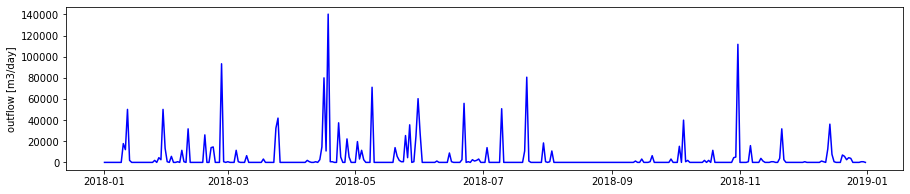

In [11]:
plt.figure(figsize = (15,3))
plt.plot(sim_data_year.index, sim_data_year['outflow'], color = 'blue')
plt.ylabel('outflow [m3/day]')

Now we can compare the observed data with the model results by plotting both time series

## Goodness-of-fit
To measure if the simulated values with a model are close to the observed data values we use googness-of-fit indicators. We are going to see three: the root mean squared error, the Nash-Sutcliffe efficiency and the coefficient of determination 

### Root mean squared error (RMSE)
The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance. It has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response. 

$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(sim_{i} - obs_{i})^{2}}$

### Nash-Sutcliffe efficiency (NSE)
The NSE indicates how well the plot of observed versus simulated data fits the 1:1 line. Nash-Sutcliffe efficiencies range from -Inf to 1. Essentially, the closer to 1, the more accurate the model is. -) NSE = 1, corresponds to a perfect match of modelled to the observed data.

Let's create two functions to compute RMSE and NSE

$NSE = 1 - \frac{\sum_{i=1}^{n}(sim_{i} - obs_{i})^{2}}{\sum_{i=1}^{n}(obs_{i} - \overline{obs})^{2}}$

In [12]:
def RMSE_function(obs,sim):
    
    RMSE = np.sqrt(((sim - obs) ** 2).mean())
    return RMSE

def NSE_function(obs,sim):
    NSE = (1 - (sum((sim - obs) ** 2) / sum((obs - np.mean(obs))**2)))
    
    return NSE

RMSE = RMSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
NSE  = NSE_function(obs_data_year['outflow'],sim_data_year['outflow'])

Let's plot the simulated outlflow vs the observed outflow

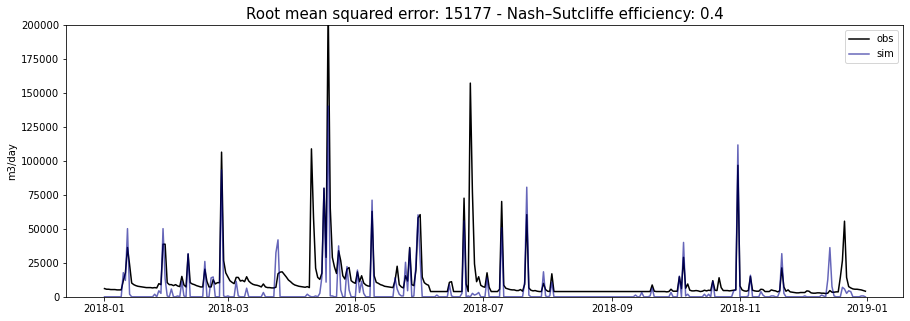

In [13]:
plt.figure(figsize=(15,5)) #
plt.plot(obs_data_year.index,obs_data_year['outflow'],color = 'black',label = 'obs')
plt.plot(sim_data_year.index,sim_data_year['outflow'],color = 'darkblue', label = 'sim',alpha = 0.6)
plt.ylabel('m3/day')
plt.ylim(0,200000)
plt.title('Root mean squared error: '+str(round(RMSE))+ ' - Nash–Sutcliffe efficiency: '+str(round(NSE,2)),fontsize = 15)
plt.legend()

Now let's combine the figure above with the plot of the daily rainfall

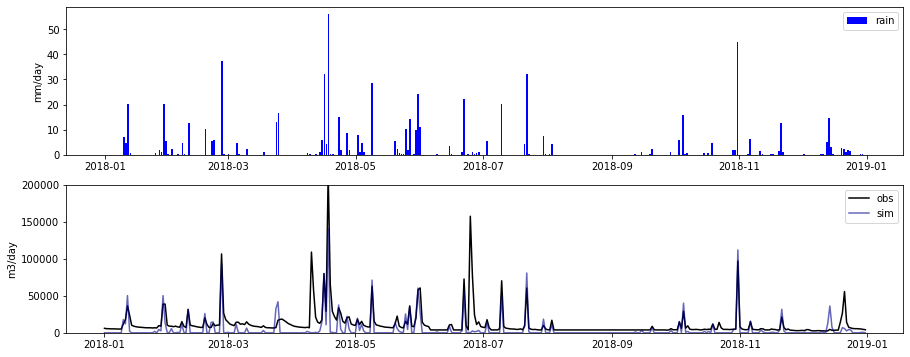

In [14]:
fig, ax =plt.subplots(2,1,figsize=(15,6)) #
ax[0].bar(obs_data_year.index,obs_data_year['rain'],color = 'blue',label = 'rain')
ax[0].set(ylabel='mm/day')
ax[0].legend()
ax[1].plot(obs_data_year.index,obs_data_year['outflow'],color = 'black',label = 'obs')
ax[1].plot(sim_data_year.index,sim_data_year['outflow'],color = 'darkblue', label = 'sim', alpha = 0.6)
ax[1].set(ylabel='m3/day')
plt.ylim(0,200000)
ax[1].legend()

And now in the same graph

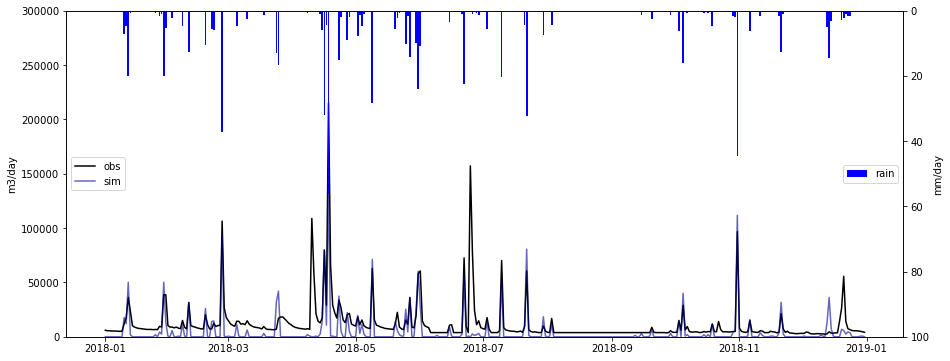

In [15]:
fig, ax =plt.subplots(figsize=(15,6)) #

ax.plot(obs_data_year.index,obs_data_year['outflow'],color = 'black',label = 'obs')
ax.plot(sim_data_year.index,sim_data_year['outflow'],color = 'darkblue', label = 'sim', alpha = 0.6)
ax.set(ylabel='m3/day', ylim =[0 ,300000])
ax.legend(loc = 6)

ax2 = ax.twinx()
ax2.bar(obs_data_year.index,obs_data_year['rain'],color = 'blue',label = 'rain')
ax2.set(ylabel='mm/day', ylim =[0 ,100])
plt.gca().invert_yaxis()
ax2.legend(loc = 7)

Even better, let's make the figure interactive, so we can choose the value of $C$ and the year of study

In [16]:
@interact(C = (0,1,0.05), year_of_study = range(2010,2020))
def interactive_figure_1(C = 0, year_of_study = 2010):

    obs_data_year = obs_data[obs_data.index.year == year_of_study] # to select only data from to the year that we want to study
    
    # Create an empty dataframe where we will save the model results
    sim_data_year = pd.DataFrame(0, index=obs_data_year.index, columns = ['rain','outflow'])
    sim_data_year['rain'] = obs_data_year['rain']
    # Run the model
    sim_data_year['outflow'] = hydro_model(sim_data_year['rain'], A, C)

    RMSE = RMSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    NSE  = NSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    
    fig, ax = plt.subplots(2,1,figsize=(15,5),sharex = True)
    ax[0].bar(obs_data_year.index,obs_data_year['rain'],color = 'blue',label = 'rain')
    ax[0].set(ylabel='mm/day')
    ax[0].legend()
    ax[1].plot(obs_data_year.index,obs_data_year['outflow'],color = 'black',label = 'obs')
    ax[1].plot(sim_data_year.index,sim_data_year['outflow'],color = 'darkblue', label = 'sim', alpha = 0.6)
    ax[1].set(ylabel='m3/day', ylim = [0,200000])
    ax[1].set_title('Root mean squared error: '+str(round(RMSE))+ ' - Nash–Sutcliffe efficiency: '+str(round(NSE,2)))
    ax[1].legend()

interactive(children=(FloatSlider(value=0.0, description='C', max=1.0, step=0.05), Dropdown(description='year_…

### Excercise 
Modifiy the code of the model so you can run the model more than one year, for example, from 2010 to 2015, instead of only one year.

In [17]:
@interact(C = (0,1,0.05), year_of_study = range(2010,2020))
def interactive_figure_1(C = 0, year_of_study = 2010):

    obs_data_year = obs_data[obs_data.index.year <= year_of_study] # to select only data from to the year that we want to study
    
    # Create an empty dataframe where we will save the model results
    sim_data_year = pd.DataFrame(0, index=obs_data_year.index, columns = ['rain','outflow'])
    sim_data_year['rain'] = obs_data_year['rain']
    # Run the model
    sim_data_year['outflow'] = hydro_model(sim_data_year['rain'], A, C)

    RMSE = RMSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    NSE  = NSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    
    fig, ax = plt.subplots(2,1,figsize=(15,5),sharex = True)
    ax[0].bar(obs_data_year.index,obs_data_year['rain'],color = 'blue',label = 'rain')
    ax[0].set(ylabel='mm/day')
    ax[0].legend()
    ax[1].plot(obs_data_year.index,obs_data_year['outflow'],color = 'black',label = 'obs')
    ax[1].plot(sim_data_year.index,sim_data_year['outflow'],color = 'darkblue', label = 'sim', alpha = 0.6)
    ax[1].set(ylabel='m3/day', ylim = [0,200000])
    ax[1].set_title('Root mean squared error: '+str(round(RMSE))+ ' - Nash–Sutcliffe efficiency: '+str(round(NSE,2)))
    ax[1].legend()

interactive(children=(FloatSlider(value=0.0, description='C', max=1.0, step=0.05), Dropdown(description='year_…

What we have done is to **calibrate** our model for a selected period of study. Now for the rest of the data we can do the **validation** of our model, i.e. use the same C value that you obtained in the calibration and apply to the rest of the data

In [18]:
@interact(C = (0,1,0.05), year_of_study = range(2010,2020))
def interactive_figure_1(C = 0, year_of_study = 2010):

    obs_data_year = obs_data[obs_data.index.year > year_of_study] # to select only data from to the year that we want to study
    
    # Create an empty dataframe where we will save the model results
    sim_data_year = pd.DataFrame(0, index=obs_data_year.index, columns = ['rain','outflow'])
    sim_data_year['rain'] = obs_data_year['rain']
    # Run the model
    sim_data_year['outflow'] = hydro_model(sim_data_year['rain'], A, C)

    RMSE = RMSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    NSE  = NSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    
    fig, ax = plt.subplots(2,1,figsize=(15,5),sharex = True)
    ax[0].bar(obs_data_year.index,obs_data_year['rain'],color = 'blue',label = 'rain')
    ax[0].set(ylabel='mm/day')
    ax[0].legend()
    ax[1].plot(obs_data_year.index,obs_data_year['outflow'],color = 'black',label = 'obs')
    ax[1].plot(sim_data_year.index,sim_data_year['outflow'],color = 'darkblue', label = 'sim', alpha = 0.6)
    ax[1].set(ylabel='m3/day', ylim = [0,200000])
    ax[1].set_title('Root mean squared error: '+str(round(RMSE))+ ' - Nash–Sutcliffe efficiency: '+str(round(NSE,2)))
    ax[1].legend()

interactive(children=(FloatSlider(value=0.0, description='C', max=1.0, step=0.05), Dropdown(description='year_…

### Questions
- Is this a good hydrological model? why?
- Does it represent the main hydrological processes that take place in the catchment?
- What does the parameter C represents?
- Would you define this model as a black-box model or a conceptual model?
- What is the best value of C for all the years of study?
- Which goodness-of-fit coefficient is better, RMSE or NSE?

### Coefficient of determination (r<sup>2</sup>)
The coefficient of determination r<sup>2</sup> is defined as the squared value of the coefficient of correlation according to Pearson. It estimates the combined dispersion against the single dispersion of the observed and predicted series. The range of r lies between 0 and 1 which describes how much of the observed dispersion is explained by the prediction. A value of zero means no correlation at all whereas a value of 1 means that the dispersion of the prediction is equal to that of the observation. 

Let's define a function to compute r<sup>2</sup>

In [19]:
def r2_function(obs,sim):
    r2 = (sum((obs - np.mean(obs))*(sim - np.mean(sim)))/
          (np.sqrt(sum((obs - np.mean(obs))**2))*np.sqrt(sum((sim - np.mean(sim))**2))))**2
    return r2

Now let's plot an interactive figure to see how r<sup>2</sup> changes with $C$

In [20]:
@interact(C = (0,1,0.05), year_of_study = range(2010,2020))
def interactive_figure_2(C = 0, year_of_study = 2011):
    
    obs_data_year = obs_data[obs_data.index.year == year_of_study] # to select only data from to the year that we want to study
    
    # Create an empty dataframe where we will save the model results
    sim_data_year = pd.DataFrame(0, index=obs_data_year.index, columns = ['rain','outflow'])
    sim_data_year['rain'] = obs_data_year['rain']
    # Run the model
    sim_data_year['outflow'] = hydro_model(sim_data_year['rain'], A, C)
    
    r2  = r2_function(obs_data_year['outflow'],sim_data_year['outflow'])
    outflow_corr = obs_data_year.corrwith(sim_data_year)['outflow']
    
    RMSE = RMSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    NSE  = NSE_function(obs_data_year['outflow'],sim_data_year['outflow'])
    
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    ax[0].scatter(obs_data_year['outflow'],sim_data_year['outflow'],color = 'red')
    ax[0].plot([0,300000],[0,300000], color = 'black')
    ax[0].set(xlabel = 'obs (m3/day)',ylabel = 'sim (m3/day)', xlim = [0,300000], ylim = [0,300000])
    ax[0].set_title('Parameter C = '+str(C)+' - Coefficient of determination = '+str(round(r2,2)))
    
    ax[1].plot(obs_data_year.index,obs_data_year['outflow'],color = 'black',label = 'obs')
    ax[1].plot(sim_data_year.index,sim_data_year['outflow'],color = 'green', label = 'sim')
    ax[1].set(ylabel='m3/day', ylim = [0,300000])
    ax[1].set_title('Root mean squared error: '+str(round(RMSE))+ ' - Nash–Sutcliffe efficiency: '+str(round(NSE,2)))
    ax[1].legend()

interactive(children=(FloatSlider(value=0.0, description='C', max=1.0, step=0.05), Dropdown(description='year_…

### Questions
- Is the coefficient of determination a good indicator to assess the performance of the model? why? 